#  Google Analytics-API - Ecommerce - Binary Classification - Transactions

## Table of Contents <a name="top"></a>
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Function](#function)
    * [Data Formats Split (Train and Test)](#dfs)
    * [Resampling Strategies Splitting](#rss)
    * [Evaluate Metrics - Precision, Recall and F1-Score](#evaluate)
    * [Classification Algorithms](#classification)
    * [Models Testing](#mt)
    * [Result of Methods Evaluation](#rme)
* [Tunig Best Models](#tbm)
    * [Social](#social)
    * [Direct](#direct)
    * [Paid Search](#paidsearch)
    * [Organic](#organic)
    * [Full DF](#fulldf)
    * [Tuning Results](#tr)
* [Feature Importance and Decision Tree Plot  (Help!)](#helptree)
    * [Social - Decision Tree and Feature Importance](#socialtree)
    * [Direct - Decision Tree and Feature Importance](#directtree)
    * [Paid Search - Decision Tree and Feature Importance](#paidsearchtree)
    * [Organic - Decision Tree and Feature Importance](#organictree)
    * [Full DF - Decision Tree and Feature Importance](#fulldftree)




# Introduction<a id="introduction"></a>



This is the second part of my first project, here we are going to do a couple of tests to find the best classification model based on the F1-Score to predict transaction sessions. We will test the data preparation(with or without outliers), data balance methods and best machine learn classification techniques for the different datasets. After that we are going to plot the best decision tree interaction of the models. 

:)



Let's get started.



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_full = pd.read_csv('/kaggle/input/google-analytics-api-ecommerce-cleaned/google-analyticsapi-ecommerce-data-cleaned.csv',index_col=0)

In [3]:
df_organic = df_full[df_full['medium']=='Organic']
df_paidsearch = df_full[df_full['medium']=='Paid Search']
df_direct = df_full[df_full['medium']=='Direct']
df_social = df_full[df_full['medium']=='Social']

## Data Cleaning  <a id="data"></a>



The data that we will use was mining from Google Analytics API. To get the granular data with the GA API we need to query for multiple dimensions simultaneously, so then every row returned will represent one session. You can [see more at Alex Papageorgioy article](https://www.linkedin.com/pulse/5-steps-get-google-analytics-ready-data-science-papageorgiou/). (Thank you Alex for the explanations)





The preparation of the data will be very simple, once we have already cleaned and organised at [Exploratory Analysis](https://www.kaggle.com/erickvarela/ga-api-e-commerce-part-i-exploratory-analysis/). Here we just will drop the columns 'ga:transactionRevenue' and 'ga:itemQuantity' to avoid data leakage and the 'medium' of the DFs splitted per medium. The Full Df will keep the 'medium' column.



After that, we will convert categorical variables into dummy/indicator variables.




In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565942 entries, 0 to 565941
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ga:transactions          565942 non-null  int64  
 1   source                   565942 non-null  object 
 2   medium                   565942 non-null  object 
 3   ga:transactionRevenue    565942 non-null  float64
 4   ga:itemQuantity          565942 non-null  int64  
 5   minutesessionDuration    565942 non-null  int64  
 6   ga:pageDepth             565942 non-null  int64  
 7   ga:hits                  565942 non-null  int64  
 8   ga:daysSinceLastSession  565942 non-null  int64  
 9   ga:operatingSystem       565942 non-null  object 
 10  ga:region                565942 non-null  object 
 11  ga:userType              565942 non-null  object 
 12  ga:day                   565942 non-null  int64  
 13  ga:hour                  565942 non-null  int64  
dtypes: f

In [5]:
drop_elements=['ga:itemQuantity','ga:transactionRevenue','medium'] 

In [6]:
df_social = df_social.drop(drop_elements, axis = 1)
df_direct = df_direct.drop(drop_elements, axis = 1)
df_paidsearch = df_paidsearch.drop(drop_elements, axis = 1)
df_organic = df_organic.drop(drop_elements, axis = 1)

In [7]:
df_social.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114971 entries, 3 to 565937
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ga:transactions          114971 non-null  int64 
 1   source                   114971 non-null  object
 2   minutesessionDuration    114971 non-null  int64 
 3   ga:pageDepth             114971 non-null  int64 
 4   ga:hits                  114971 non-null  int64 
 5   ga:daysSinceLastSession  114971 non-null  int64 
 6   ga:operatingSystem       114971 non-null  object
 7   ga:region                114971 non-null  object
 8   ga:userType              114971 non-null  object
 9   ga:day                   114971 non-null  int64 
 10  ga:hour                  114971 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 10.5+ MB


In [8]:
df_direct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93036 entries, 68 to 565934
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ga:transactions          93036 non-null  int64 
 1   source                   93036 non-null  object
 2   minutesessionDuration    93036 non-null  int64 
 3   ga:pageDepth             93036 non-null  int64 
 4   ga:hits                  93036 non-null  int64 
 5   ga:daysSinceLastSession  93036 non-null  int64 
 6   ga:operatingSystem       93036 non-null  object
 7   ga:region                93036 non-null  object
 8   ga:userType              93036 non-null  object
 9   ga:day                   93036 non-null  int64 
 10  ga:hour                  93036 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 8.5+ MB


In [9]:
df_paidsearch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169042 entries, 3424 to 565941
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ga:transactions          169042 non-null  int64 
 1   source                   169042 non-null  object
 2   minutesessionDuration    169042 non-null  int64 
 3   ga:pageDepth             169042 non-null  int64 
 4   ga:hits                  169042 non-null  int64 
 5   ga:daysSinceLastSession  169042 non-null  int64 
 6   ga:operatingSystem       169042 non-null  object
 7   ga:region                169042 non-null  object
 8   ga:userType              169042 non-null  object
 9   ga:day                   169042 non-null  int64 
 10  ga:hour                  169042 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 15.5+ MB


In [10]:
df_organic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186314 entries, 0 to 565935
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ga:transactions          186314 non-null  int64 
 1   source                   186314 non-null  object
 2   minutesessionDuration    186314 non-null  int64 
 3   ga:pageDepth             186314 non-null  int64 
 4   ga:hits                  186314 non-null  int64 
 5   ga:daysSinceLastSession  186314 non-null  int64 
 6   ga:operatingSystem       186314 non-null  object
 7   ga:region                186314 non-null  object
 8   ga:userType              186314 non-null  object
 9   ga:day                   186314 non-null  int64 
 10  ga:hour                  186314 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 17.1+ MB


In [11]:
drop_elements = ['ga:itemQuantity','ga:transactionRevenue']

In [12]:
df_full = df_full.drop(drop_elements, axis = 1)

In [13]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565942 entries, 0 to 565941
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ga:transactions          565942 non-null  int64 
 1   source                   565942 non-null  object
 2   medium                   565942 non-null  object
 3   minutesessionDuration    565942 non-null  int64 
 4   ga:pageDepth             565942 non-null  int64 
 5   ga:hits                  565942 non-null  int64 
 6   ga:daysSinceLastSession  565942 non-null  int64 
 7   ga:operatingSystem       565942 non-null  object
 8   ga:region                565942 non-null  object
 9   ga:userType              565942 non-null  object
 10  ga:day                   565942 non-null  int64 
 11  ga:hour                  565942 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 56.1+ MB


In [14]:
social_df = pd.get_dummies(df_social)
direct_df = pd.get_dummies(df_direct)
paidsearch_df = pd.get_dummies(df_paidsearch)
organic_df = pd.get_dummies(df_organic)
full_df = pd.get_dummies(df_full)

# Methodology <a id="methodology"></a>

Previously, in [ GA API - E-commerce Data - Part I - Exploratory Analysis](https://www.kaggle.com/erickvarela/ga-api-e-commerce-parti-exploratory-analysis) we saw that each medium of traffic has particularities and that split the data based on the traffic sources can help us to get better analyses. Here we will check the premise that can improve the accuracy in machine learning problems building splitting the data. So, we will build a classification model per traffic and one classification model for the full DF and see what analysis has the higher accuracy.


As we saw at [Part I](https://www.kaggle.com/erickvarela/ga-api-e-commerce-part-i-exploratory-analysis/) the DFs are very unbalanced with transactions as the minority class. Each DF has its outliers and a very high number of zeros in 'minutesessionDuration'. To build the best model we will test some hypotheses.

- If we should train the model with outliers or without them.

- If we should train the model with zeros or without them.

- If we should balance the DF to get better results 

Also we will see:

- What is the best balance method per medium.

- What are the best classification methods per medium.

As in [Part I](https://www.kaggle.com/erickvarela/ga-api-e-commerce-part-i-exploratory-analyse/) we are going to build functions to make the process easy.


# Functions <a id='function'>

In that section will define a few functions that will be called later by the main function.

## Data Split Formats  (Train and Test) <a id='dfs'>
Those functions will split the DFs in X_train and y_train and return them. The unique function that will return X_test and y_test will be the raw_data split. In this way, we will always test our model in the raw data set. The real world scenario.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
def Raw_Data(df):
    
    ## Raw split - that function will return the test df and will be used in all combinations.
    X_1 = df.drop('ga:transactions', axis=1)
    y_1 = df['ga:transactions']

    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,
                                                                y_1,
                                                                random_state=1,
                                                                test_size=0.3)
    
    return X_train_1, X_test_1, y_train_1, y_test_1 

In [17]:
def Without_Zeros(df):
    
    ## Split without zeros
    df = df[(df['minutesessionDuration']>0)&(df['ga:pageDepth']>0)]
    
    X_2 = df.drop('ga:transactions', axis=1)
    y_2 = df['ga:transactions']

    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,
                                                                y_2,
                                                                random_state=1,
                                                                test_size=0.3)
    
    return X_train_2, y_train_2

In [18]:
def Without_Outliers(df):
    
    ## Split without zeros
    df_new = df.copy()
    
    # Behavior columns to find the higher outliers
    
    behavior=['minutesessionDuration','ga:pageDepth','ga:hits']
    
    #Calculating the Interquartile Range
        
    for count,i in enumerate(behavior):
        Q1 = df[behavior[count]].quantile(0.25)
        Q3 = df[behavior[count]].quantile(0.75)
        IQR = Q3 - Q1
        #Apling the 1.5 rule for higher outliers
        df_new = df_new[~(df_new[behavior[count]] > (Q3 + 1.5 * IQR))]
                
    
    X_3 = df_new.drop('ga:transactions', axis=1)
    y_3 = df_new['ga:transactions']


    X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3,
                                                                y_3,
                                                                random_state=1,
                                                                test_size=0.3)
    
    return  X_train_3,  y_train_3

In [19]:
def Without_Zeros_Outliers(df):
    
    ## Split without zeros and outliers
    df_new = df.copy()
    
    # Behavior columns to find the higher outliers
    
    quantitative=['minutesessionDuration','ga:pageDepth','ga:hits']
    
    #Calculating the Interquartile Range
        
    for count,i in enumerate(quantitative):
        Q1 = df[quantitative[count]].quantile(0.25)
        Q3 = df[quantitative[count]].quantile(0.75)
        IQR = Q3 - Q1
        #Apling the 1.5 rule for higher outliers
        df_new = df_new[~(df_new[quantitative[count]] > (Q3 + 1.5 * IQR))]
    #Dropping 'minutesessionDuration' and 'ga:pageDepth' < 0             
    df_new = df_new[(df_new['minutesessionDuration']>0)&(df_new['ga:pageDepth']>0)]    
    
    X_4 = df_new.drop('ga:transactions', axis=1)
    y_4 = df_new['ga:transactions']


    X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4,
                                                                y_4,
                                                                random_state=1,
                                                                test_size=0.3)
    
    return  X_train_4,  y_train_4

##  Resampling Strategies Splitting



Different types of resampling work best with different data sets.
Since our intention is to extract decision rules generating a reliable decision tree, we must avoid methods which generate synthetic data such as SMOTE. 



We are going to test three resampling strategies. 



* Random Under Sampler  - RUS - Under-sample the majority class by randomly picking samples with or without replacement.



* Random Over Sampler - ROS - Over-sample the minority class by picking samples at random with replacement.



* TomekLink Under Sampling - Under-sampling by removing the instances of the majority class, facilitating the classification process.



I highly recommend the [Rafael's](https://www.kaggle.com/rafjaa) [Notebook](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets) for more informations about resampling strategies.


In [20]:
#Data Balance Method

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks


In [21]:
# Random UnderSampler

def Rus_Split(X_train, y_train): 

    rus = RandomUnderSampler()

    X_rus, y_rus  = rus.fit_sample(X_train ,  y_train)


    return X_rus, y_rus

In [22]:
# Random OverSampler

def Ros_Split(X_train, y_train):
    
    ros = RandomOverSampler()

    X_ros, y_ros = ros.fit_sample(X_train, y_train)

   
    return X_ros, y_ros

In [23]:
# Under sampler TomekLinks

def Ustl_Split(X_train, y_train):
    
    tl = TomekLinks( sampling_strategy ='majority')

    X_tl, y_tl= tl.fit_sample(X_train, y_train)


    return X_tl, y_tl

## Evaluate Metrics - Precision, Recall and F1-Score <a id='evaluate'>

For evaluating the binary classification models we will use Precision and Recall and F1-Score.

* Precision - The number of positive predictions divided by the total number of positive class values predicted.

* Recall - The number of True Positives divided by the number of True Positives and the number of False Negatives. 

* F1-score - The F1 Score is the 2*((precision*recall)/(precision+recall)). Put another way, it is a balance between precision and recall and it will be the main evaluation.


[See more](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/#:~:text=F1%20Score,the%20precision%20and%20the%20recall.) at Jason's article.


In [24]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [25]:
def Model_Score(model, y_test, X_test):

    y_pred = model.predict(X_test)
    
    total_score = {'Recall':[recall_score(y_test, y_pred)],
                   'Precision' : [precision_score(y_test, y_pred)],
                   'F1_score' : [f1_score(y_test, y_pred)]}
     
    total_score = pd.DataFrame(total_score, columns = ['Recall','Precision','F1_score'])

    
    return total_score

## Classification Algorithms <a id='classification'>

We will test three classification algorithms

* Decision Tree Classifier
* Random Forest Classifier
* Extreme Gradient Boosting


In [26]:
# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

## Models Test <a id='mt'>

The next function will test.

* 4 Data preparations  
    * Raw Data

    * Without Zeros

    * Without Outliers

    * Without Zero and Outliers
    

* 3 Balancing strategy  
    * Random Under Sampler

    * Random Over Sampler

    * TomekLinks Under Sampler
    

* 3 Different algorithms 
    * Decision Tree Classifier

    * Random Forest Classifier

    * Extreme Gradient Boosting


In the end will return a table with the recall precision and f1-score based on the test set Raw Data for the 48 different models.



In [27]:
def Models_Binary_Classification(df):
    
    # Data Formats splits 
    
    ## raw df - 1 
    
    X_train_1, X_test_1 ,y_train_1, y_test_1 = Raw_Data(df)
    
    ## Data Without Zeros - 2
    
    X_train_2,  y_train_2,  = Without_Zeros(df) 
   
    ## Without Outliers - 3
    
    X_train_3, y_train_3 = Without_Outliers(df)
    
    ##  Without Zero & Outliers - 4
    
    
    X_train_4,  y_train_4  = Without_Zeros_Outliers(df)
    

     # 1 - Decision Tree Classifier (DTC) 
    
    
    # 1.1 Unbalanced

    
    ### 1.1.1 - DTC - Unbalanced DF - Raw DF

    DTC_1_1 = DecisionTreeClassifier(random_state=0, max_depth=5)

    DTC_1_1.fit(X_train_1, y_train_1)

    DTC_score_1_1 = Model_Score(DTC_1_1, y_test_1, X_test_1)
    
    ### 1.1.2 - DTC - Unbalanced DF - Without Zeros

    DTC_1_2 = DecisionTreeClassifier(random_state=0, max_depth=5)

    DTC_1_2.fit(X_train_2, y_train_2)

    DTC_score_1_2 = Model_Score(DTC_1_2, y_test_1, X_test_1)
     
    ## 1.1.3 - DTC - Unbalanced DF - Without Outliers  

    DTC_1_3 = DecisionTreeClassifier(random_state=0, max_depth=5 )

    DTC_1_3.fit(X_train_3, y_train_3)

    DTC_score_1_3 = Model_Score(DTC_1_3, y_test_1, X_test_1)

    ###  1.1.4- DTC - Unbalanced DF - Without Zeros and Outliers

    DTC_1_4 = DecisionTreeClassifier(random_state=0, max_depth=5 )

    DTC_1_4.fit(X_train_4, y_train_4)

    DTC_score_1_4 = Model_Score(DTC_1_4, y_test_1, X_test_1)
    
    
    ## 1.2 - Random Under Sampling (RUS)
    
   
    ### 1.2.1 DTC - RUS - Raw DF

    X_train_2_1, y_train_2_1, = Rus_Split(X_train_1, y_train_1)

    DTC_2_1 = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth = 5)

    DTC_2_1.fit(X_train_2_1, y_train_2_1)

    DTC_score_2_1 = Model_Score(DTC_2_1, y_test_1, X_test_1)

    ### 1.2.2 - DTC - RUS - Without Zeros

    X_train_2_2, y_train_2_2 = Rus_Split(X_train_2, y_train_2)

    DTC_2_2 = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth = 5)

    DTC_2_2.fit(X_train_2_2, y_train_2_2)

    DTC_score_2_2 = Model_Score(DTC_2_2, y_test_1, X_test_1)


    ### 1.2.3 - DTC - RUS - Without Outliers 

    X_train_2_3, y_train_2_3 = Rus_Split(X_train_3, y_train_3)

    DTC_2_3 = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth = 5)

    DTC_2_3.fit(X_train_2_3, y_train_2_3)

    DTC_score_2_3 = Model_Score(DTC_2_3, y_test_1, X_test_1)


    ### 1.2.4 - DTC - RUS - Without Zeros and Outliers

    X_train_2_4, y_train_2_4, = Rus_Split(X_train_4, y_train_4)

    DTC_2_4 = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth = 5)

    DTC_2_4.fit(X_train_2_4, y_train_2_4)

    DTC_score_2_4 = Model_Score(DTC_2_4, y_test_1, X_test_1)

    
    ## 1.3 - Randon Over Sample (ROS)
    
    
    ### 1.3.1 - DTC - ROS  - Raw DF

    X_train_3_1, y_train_3_1 = Ros_Split(X_train_1, y_train_1)

    DTC_3_1 = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth=5)

    DTC_3_1.fit(X_train_3_1, y_train_3_1)

    DTC_score_3_1 = Model_Score(DTC_3_1, y_test_1, X_test_1)

    ### 1.3.2 - DTC - ROS - Without Zeros

    X_train_3_2, y_train_3_2 = Ros_Split(X_train_2, y_train_2)

    DTC_3_2 = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth=5)

    DTC_3_2.fit(X_train_3_2, y_train_3_2)

    DTC_score_3_2 = Model_Score(DTC_3_2, y_test_1, X_test_1)

    ### 1.3.3 - DTC - ROS - Without Outliers 

    X_train_3_3, y_train_3_3 = Ros_Split(X_train_3, y_train_3)

    DTC_3_3 = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth=5)

    DTC_3_3.fit(X_train_3_3, y_train_3_3)

    DTC_score_3_3 = Model_Score(DTC_3_3, y_test_1, X_test_1)

    ### 1.3.4 - DTC - ROS - Without Zeros and Outliers

    X_train_3_4, y_train_3_4 = Ros_Split(X_train_4, y_train_4)

    DTC_3_4 = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth=5)

    DTC_3_4.fit(X_train_3_4, y_train_3_4)

    DTC_score_3_4 = Model_Score(DTC_3_4, y_test_1, X_test_1)

    
    ## 1.4 Under-sampling: Tomek Links (USTL)

    
    ### 1.4.1 - DTC - USTL - Raw DF

    X_train_4_1, y_train_4_1 = Ustl_Split(X_train_1, y_train_1)

    DTC_4_1 = DecisionTreeClassifier(class_weight='balanced',max_depth = 5)

    DTC_4_1.fit(X_train_4_1, y_train_4_1)

    DTC_score_4_1 = Model_Score(DTC_4_1, y_test_1, X_test_1)

    ### 1.4.2 - DTC - USTL - Without Zeros

    X_train_4_2, y_train_4_2= Ustl_Split(X_train_2, y_train_2)

    DTC_4_2 = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth = 5)

    DTC_4_2.fit(X_train_4_2, y_train_4_2)

    DTC_score_4_2 = Model_Score(DTC_4_2, y_test_1, X_test_1)

    ### 1.4.3 - DTC - USTL - Without Outliers 

    X_train_4_3, y_train_4_3 = Ustl_Split(X_train_3, y_train_3)

    DTC_4_3 = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth = 5)

    DTC_4_3.fit(X_train_4_3, y_train_4_3)

    DTC_score_4_3 = Model_Score(DTC_4_3, y_test_1, X_test_1)

    ### 1.4.4 - DTC - USTL - Without Zeros and Outliers

    X_train_4_4, y_train_4_4 = Ustl_Split(X_train_4, y_train_4)

    DTC_4_4 = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth=5)

    DTC_4_4.fit(X_train_4_4, y_train_4_4)

    DTC_score_4_4 = Model_Score(DTC_4_4, y_test_1, X_test_1)


    
    # 2 - Ramdon Forrest  Classifier (RFC) 

    
    # 2.1 RFC - Unbalanced DF

    
    ### 2.1.1 - RFC - Unbalanced DF - Raw DF

    RFC_1_1 = RandomForestClassifier(random_state=0, max_depth=5)

    RFC_1_1.fit(X_train_1, y_train_1)

    RFC_score_1_1 = Model_Score(RFC_1_1, y_test_1, X_test_1)

    ### 2.1.2 - RFC - Unbalanced DF - Without Zeros

    RFC_1_2 = RandomForestClassifier(random_state=0, max_depth=5)

    RFC_1_2.fit(X_train_2, y_train_2)

    RFC_score_1_2 = Model_Score(RFC_1_2, y_test_1, X_test_1)

    ## 2.1.3 - RFC - Unbalanced DF - Without Outliers 

    RFC_1_3 =  RandomForestClassifier(random_state=0, max_depth=5)

    RFC_1_3.fit(X_train_3, y_train_3.ravel())

    RFC_score_1_3 = Model_Score(RFC_1_3, y_test_1, X_test_1)

    ###  2.1.4 - RFC - Unbalanced DF - Without Zeros and Outliers

    RFC_1_4 = RandomForestClassifier(random_state=0, max_depth=5 )

    RFC_1_4.fit(X_train_4, y_train_4)

    RFC_score_1_4 = Model_Score(RFC_1_4, y_test_1, X_test_1)

   
    ## 2.2 - RFC - Random Under Sampling (RUS)

    
    ### 2.2.1 RFC - RUS - Raw DF

    RFC_2_1 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth=5)

    RFC_2_1.fit(X_train_2_1, y_train_2_1)

    RFC_score_2_1 = Model_Score(RFC_2_1, y_test_1, X_test_1)

    RFC_score_2_1

    ### 2.2.2 - RFC - RUS - Without Zeros

    RFC_2_2 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth=5)

    RFC_2_2.fit(X_train_2_2, y_train_2_2)

    RFC_score_2_2 = Model_Score(RFC_2_2, y_test_1, X_test_1)

    ### 2.2.3 - RFC - RUS - Without Outliers 

    RFC_2_3 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth=5)

    RFC_2_3.fit(X_train_2_3, y_train_2_3.ravel())

    RFC_score_2_3 = Model_Score(RFC_2_3, y_test_1, X_test_1)

    ### 2.2.4 - RFC - RUS- Without Zeros and Outliers

    RFC_2_4 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth = 5)

    RFC_2_4.fit(X_train_2_4, y_train_2_4)

    RFC_score_2_4 = Model_Score(RFC_2_4, y_test_1, X_test_1)

    
    ## 2.3 - RFC - Randon Over Sample (ROS)

    
    ### 2.3.1 -  RFC - ROS  - Raw DF

    RFC_3_1 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth=5)

    RFC_3_1.fit(X_train_3_1, y_train_3_1)

    RFC_score_3_1 = Model_Score(RFC_3_1, y_test_1, X_test_1)

    ### 2.3.2 -  RFC - ROS - Without Zeros

    RFC_3_2 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth=5)

    RFC_3_2.fit(X_train_3_2, y_train_3_2)

    RFC_score_3_2 = Model_Score( RFC_3_2, y_test_1, X_test_1)

    ### 2.3.3 - RFC - ROS - Without Outliers 

    RFC_3_3 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth=5)

    RFC_3_3.fit(X_train_3_3, y_train_3_3)

    RFC_score_3_3 = Model_Score(RFC_3_3, y_test_1, X_test_1)

    ### 2.3.4 - RFC - ROS - Without Zeros and Outliers

    RFC_3_4 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth=5)

    RFC_3_4.fit(X_train_3_4, y_train_3_4)

    RFC_score_3_4 = Model_Score(RFC_3_4, y_test_1, X_test_1)


    ## 2.4 - RFC - Under-sampling: Tomek Links (USTL)

    
    ### 2.4.1 - RFC - USTL - Raw DF

    RFC_4_1 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth=5)

    RFC_4_1.fit(X_train_4_1, y_train_4_1)

    RFC_score_4_1 = Model_Score(RFC_4_1, y_test_1, X_test_1)

    ### 1.4.2 - RFC - USTL - Without Zeros

    RFC_4_2 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth=5)

    RFC_4_2.fit(X_train_4_2, y_train_4_2)

    RFC_score_4_2 = Model_Score(RFC_4_2, y_test_1, X_test_1)

    ### 2.4.3 - RFC - USTL - Without Outliers 

    RFC_4_3 = RandomForestClassifier(class_weight='balanced',max_depth = 5)

    RFC_4_3.fit(X_train_4_3, y_train_4_3)

    RFC_score_4_3 = Model_Score( RFC_4_3, y_test_1, X_test_1)

    ### 1.4.4 - RFC - USTL - Without Zeros and Outliers

    RFC_4_4 = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth = 5)

    RFC_4_4.fit(X_train_4_4, y_train_4_4)

    RFC_score_4_4 = Model_Score(RFC_4_4, y_test_1, X_test_1)


    ## 3 - XGBClassifier (XGBC)


    # 3.1 XGBC - Unbalanced DF

    
    ### 3.1.1 - XGBC - Unbalanced DF - Raw DF

    XGBC_1_1 = xgb.XGBClassifier(random_state=0,max_depth=5)

    XGBC_1_1.fit(X_train_1, y_train_1)

    XGBC_score_1_1 = Model_Score(XGBC_1_1, y_test_1, X_test_1)

    ### 3.1.2 - XGBC - Unbalanced DF - Without Zeros

    XGBC_1_2 = xgb.XGBClassifier(random_state=0,max_depth=5)

    XGBC_1_2.fit(X_train_2, y_train_2.values.ravel())

    XGBC_score_1_2 = Model_Score(XGBC_1_2, y_test_1, X_test_1)

    ## 3.1.3 - XGBC - Unbalanced DF - Without Outliers 

    XGBC_1_3 = xgb.XGBClassifier(random_state=0,max_depth=5)

    XGBC_1_3.fit(X_train_3, y_train_3)

    XGBC_score_1_3 = Model_Score(XGBC_1_3, y_test_1, X_test_1)

    ###  3.1.4 - XGBC - Unbalanced DF - Without Zeros and Outliers

    XGBC_1_4 = xgb.XGBClassifier(random_state=0,max_depth=5)

    XGBC_1_4.fit(X_train_4, y_train_4)

    XGBC_score_1_4 = Model_Score(XGBC_1_4, y_test_1, X_test_1)


    ## 3.2 - XGBC - Random Under Sampling (RUS)

    
    ### 3.2.1 - XGBC - RUS - Raw DF

    XGBC_2_1 = xgb.XGBClassifier(random_state=0, max_depth=5)

    XGBC_2_1.fit(X_train_2_1, y_train_2_1)

    XGBC_score_2_1 = Model_Score(XGBC_2_1, y_test_1, X_test_1)

    ### 3.2.2 - XGBC - RUS - Without Zeros

    XGBC_2_2 = xgb.XGBClassifier(random_state=0, max_depth=5)

    XGBC_2_2.fit(X_train_2_2, y_train_2_2)

    XGBC_score_2_2 = Model_Score(XGBC_2_2, y_test_1, X_test_1)

    ### 3.2.3 - XGBC - RUS - Without Outliers 

    XGBC_2_3 = xgb.XGBClassifier(random_state=0, max_depth=5)

    XGBC_2_3.fit(X_train_2_3, y_train_2_3)

    XGBC_score_2_3 = Model_Score(XGBC_2_3, y_test_1, X_test_1)


    ### 3.2.4 - XGBC - RUS - Without Zeros and Outliers

    XGBC_2_4 = xgb.XGBClassifier(random_state=0, max_depth=5)

    XGBC_2_4.fit(X_train_2_4, y_train_2_4)

    XGBC_score_2_4 = Model_Score(XGBC_2_4, y_test_1, X_test_1)


    ## 3.3 - XGBC - Randon Over Sample (ROS)

    
    ### 3.3.1 -  XGBC - ROS  - Raw DF

    XGBC_3_1 = xgb.XGBClassifier(random_state=0, max_depth=5)

    XGBC_3_1.fit(X_train_3_1, y_train_3_1)

    XGBC_score_3_1 = Model_Score(XGBC_3_1, y_test_1, X_test_1)

    ### 3.3.2 -  XGBC - ROS - Without Zeros

    XGBC_3_2 = xgb.XGBClassifier(random_state=0, max_depth=5)

    XGBC_3_2.fit(X_train_3_2, y_train_3_2)

    XGBC_score_3_2 = Model_Score(XGBC_3_2, y_test_1, X_test_1)

    ### 3.3.3 - XGBC - ROS - Without Outliers 

    XGBC_3_3 = xgb.XGBClassifier(random_state=0, max_depth=5)
    
    XGBC_3_3.fit(X_train_3_3, y_train_3_3)

    XGBC_score_3_3 = Model_Score(XGBC_3_3, y_test_1, X_test_1)

    ### 3.3.4 - RFC - ROS - Without Zeros and Outliers

    XGBC_3_4 = xgb.XGBClassifier(random_state=0, max_depth=5)

    XGBC_3_4.fit(X_train_3_4, y_train_3_4)

    XGBC_score_3_4 = Model_Score(XGBC_3_4, y_test_1, X_test_1)


    ## 3.4 - XGBC - Under-sampling: Tomek Links (USTL)

    
    ### 3.4.1 - XGBC - USTL - Raw DF

    XGBC_4_1 = xgb.XGBClassifier(random_state=0, max_depth=5)

    XGBC_4_1.fit(X_train_4_1, y_train_4_1)

    XGBC_score_4_1 = Model_Score(XGBC_4_1, y_test_1, X_test_1)

    ### 3.4.2 - XGBC - UTL - Without Zeros

    XGBC_4_2 = xgb.XGBClassifier(random_state=0, max_depth=5)

    XGBC_4_2.fit(X_train_4_2, y_train_4_2)

    XGBC_score_4_2 = Model_Score(XGBC_4_2, y_test_1, X_test_1)

    ### 3.4.3 - XGBC - USTL - Without Outliers 

    XGBC_4_3 = xgb.XGBClassifier(random_state=0, max_depth=5)

    XGBC_4_3.fit(X_train_4_3, y_train_4_3)

    XGBC_score_4_3 = Model_Score( XGBC_4_3, y_test_1, X_test_1)

    ### 3.4.4 - XGBC - USTL - Without Zeros and Outliers

    XGBC_4_4 = xgb.XGBClassifier(random_state=0, max_depth=5)

    XGBC_4_4.fit(X_train_4_4, y_train_4_4)

    XGBC_score_4_4 = Model_Score( XGBC_4_4, y_test_1, X_test_1)


    


    # Best F1_Score

    
    Score = {'Methods': [ 'DTC - Unbalanced DF - Raw DF',
                                    'DTC - Unbalanced DF - Without Zeros',
                                    'DTC - Unbalanced DF - Without Outliers ',
                                    'DTC - Unbalanced DF - Without Zeros and Outliers',
                                    'DTC - RUS - Raw DF',
                                    'DTC - RUS - Without Zeros',
                                    'DTC - RUS - Without Outliers ',
                                    'DTC - RUS - Without Zeros and Outliers',
                                    'DTC - ROS - Raw DF',
                                    'DTC - ROS - Without Zeros',
                                    'DTC - ROS - Without Outliers ',
                                    'DTC - ROS - Without Zeros and Outliers',
                                    'DTC - USTL - Raw DF',
                                    'DTC - USTL - Without Zeros',
                                    'DTC - USTL - Without Outliers ',
                                    'DTC - USTL - Without Zeros and Outliers',
                                    'RFC - Unbalanced DF - Raw DF',
                                    'RFC - Unbalanced DF - Without Zeros',
                                    'RFC - Unbalanced DF - Without Outliers ',
                                    'RFC - Unbalanced DF - Without Zeros and Outliers',
                                    'RFC - RUS - Raw DF',
                                    'RFC - RUS - Without Zeros',
                                    'RFC - RUS - Without Outliers ',
                                    'RFC - RUS - Without Zeros and Outliers',
                                    'RFC - ROS - Raw DF',
                                    'RFC - ROS - Without Zeros',
                                    'RFC - ROS - Without Outliers ',
                                    'RFC - ROS - Without Zeros and Outliers',
                                    'RFC - USTL - Raw DF',
                                    'RFC - USTL - Without Zeros',
                                    'RFC - USTL - Without Outliers ',
                                    'RFC - USTL - Without Zeros and Outliers',
                                    'XGB - Unbalanced DF - Raw DF',
                                    'XGB - Unbalanced DF - Without Zeros',
                                    'XGB - Unbalanced DF - Without Outliers ',
                                    'XGB - Unbalanced DF - Without Zeros and Outliers',
                                    'XGB - RUS - Raw DF',
                                    'XGB - RUS - Without Zeros',
                                    'XGB - RUS - Without Outliers ',
                                    'XGB - RUS - Without Zeros and Outliers',
                                    'XGB - ROS - Raw DF',
                                    'XGB - ROS - Without Zeros',
                                    'XGB - ROS - Without Outliers ',
                                    'XGB - ROS - Without Zeros and Outliers',
                                    'XGB - USTL - Raw DF',
                                    'XGB - USTL - Without Zeros',
                                    'XGB - USTL - Without Outliers ',
                                    'XGB - USTL - Without Zeros and Outliers'
                                    
                                   ],
                            'Recall': [DTC_score_1_1["Recall"][0],
                                        DTC_score_1_2["Recall"][0],
                                        DTC_score_1_3["Recall"][0],
                                        DTC_score_1_4["Recall"][0],
                                        DTC_score_2_1["Recall"][0],
                                        DTC_score_2_2["Recall"][0],
                                        DTC_score_2_3["Recall"][0],
                                        DTC_score_2_4["Recall"][0],
                                        DTC_score_3_1["Recall"][0],
                                        DTC_score_3_2["Recall"][0],
                                        DTC_score_3_3["Recall"][0],
                                        DTC_score_3_4["Recall"][0],
                                        DTC_score_4_1["Recall"][0],
                                        DTC_score_4_2["Recall"][0],
                                        DTC_score_4_3["Recall"][0],
                                        DTC_score_4_4["Recall"][0],
                                        RFC_score_1_1["Recall"][0],
                                        RFC_score_1_2["Recall"][0],
                                        RFC_score_1_3["Recall"][0],
                                        RFC_score_1_4["Recall"][0],
                                        RFC_score_2_1["Recall"][0],
                                        RFC_score_2_2["Recall"][0],
                                        RFC_score_2_3["Recall"][0],
                                        RFC_score_2_4["Recall"][0],
                                        RFC_score_3_1["Recall"][0],
                                        RFC_score_3_2["Recall"][0],
                                        RFC_score_3_3["Recall"][0],
                                        RFC_score_3_4["Recall"][0],
                                        RFC_score_4_1["Recall"][0],
                                        RFC_score_4_2["Recall"][0],
                                        RFC_score_4_3["Recall"][0],
                                        RFC_score_4_4["Recall"][0],
                                        XGBC_score_1_1["Recall"][0],
                                        XGBC_score_1_2["Recall"][0],
                                        XGBC_score_1_3["Recall"][0],
                                        XGBC_score_1_4["Recall"][0],
                                        XGBC_score_2_1["Recall"][0],
                                        XGBC_score_2_2["Recall"][0],
                                        XGBC_score_2_3["Recall"][0],
                                        XGBC_score_2_4["Recall"][0],
                                        XGBC_score_3_1["Recall"][0],
                                        XGBC_score_3_2["Recall"][0],
                                        XGBC_score_3_3["Recall"][0],
                                        XGBC_score_3_4["Recall"][0],
                                        XGBC_score_4_1["Recall"][0],
                                        XGBC_score_4_2["Recall"][0],
                                        XGBC_score_4_3["Recall"][0],
                                        XGBC_score_4_4["Recall"][0]
                                    ],
                'Precision': [DTC_score_1_1["Precision"][0],
                                        DTC_score_1_2["Precision"][0],
                                        DTC_score_1_3["Precision"][0],
                                        DTC_score_1_4["Precision"][0],
                                        DTC_score_2_1["Precision"][0],
                                        DTC_score_2_2["Precision"][0],
                                        DTC_score_2_3["Precision"][0],
                                        DTC_score_2_4["Precision"][0],
                                        DTC_score_3_1["Precision"][0],
                                        DTC_score_3_2["Precision"][0],
                                        DTC_score_3_3["Precision"][0],
                                        DTC_score_3_4["Precision"][0],
                                        DTC_score_4_1["Precision"][0],
                                        DTC_score_4_2["Precision"][0],
                                        DTC_score_4_3["Precision"][0],
                                        DTC_score_4_4["Precision"][0],
                                        RFC_score_1_1["Precision"][0],
                                        RFC_score_1_2["Precision"][0],
                                        RFC_score_1_3["Precision"][0],
                                        RFC_score_1_4["Precision"][0],
                                        RFC_score_2_1["Precision"][0],
                                        RFC_score_2_2["Precision"][0],
                                        RFC_score_2_3["Precision"][0],
                                        RFC_score_2_4["Precision"][0],
                                        RFC_score_3_1["Precision"][0],
                                        RFC_score_3_2["Precision"][0],
                                        RFC_score_3_3["Precision"][0],
                                        RFC_score_3_4["Precision"][0],
                                        RFC_score_4_1["Precision"][0],
                                        RFC_score_4_2["Precision"][0],
                                        RFC_score_4_3["Precision"][0],
                                        RFC_score_4_4["Precision"][0],
                                        XGBC_score_1_1["Precision"][0],
                                        XGBC_score_1_2["Precision"][0],
                                        XGBC_score_1_3["Precision"][0],
                                        XGBC_score_1_4["Precision"][0],
                                        XGBC_score_2_1["Precision"][0],
                                        XGBC_score_2_2["Precision"][0],
                                        XGBC_score_2_3["Precision"][0],
                                        XGBC_score_2_4["Precision"][0],
                                        XGBC_score_3_1["Precision"][0],
                                        XGBC_score_3_2["Precision"][0],
                                        XGBC_score_3_3["Precision"][0],
                                        XGBC_score_3_4["Precision"][0],
                                        XGBC_score_4_1["Precision"][0],
                                        XGBC_score_4_2["Precision"][0],
                                        XGBC_score_4_3["Precision"][0],
                                        XGBC_score_4_4["Precision"][0]
                                    ],
                'F1_Score': [DTC_score_1_1["F1_score"][0],
                                        DTC_score_1_2["F1_score"][0],
                                        DTC_score_1_3["F1_score"][0],
                                        DTC_score_1_4["F1_score"][0],
                                        DTC_score_2_1["F1_score"][0],
                                        DTC_score_2_2["F1_score"][0],
                                        DTC_score_2_3["F1_score"][0],
                                        DTC_score_2_4["F1_score"][0],
                                        DTC_score_3_1["F1_score"][0],
                                        DTC_score_3_2["F1_score"][0],
                                        DTC_score_3_3["F1_score"][0],
                                        DTC_score_3_4["F1_score"][0],
                                        DTC_score_4_1["F1_score"][0],
                                        DTC_score_4_2["F1_score"][0],
                                        DTC_score_4_3["F1_score"][0],
                                        DTC_score_4_4["F1_score"][0],
                                        RFC_score_1_1["F1_score"][0],
                                        RFC_score_1_2["F1_score"][0],
                                        RFC_score_1_3["F1_score"][0],
                                        RFC_score_1_4["F1_score"][0],
                                        RFC_score_2_1["F1_score"][0],
                                        RFC_score_2_2["F1_score"][0],
                                        RFC_score_2_3["F1_score"][0],
                                        RFC_score_2_4["F1_score"][0],
                                        RFC_score_3_1["F1_score"][0],
                                        RFC_score_3_2["F1_score"][0],
                                        RFC_score_3_3["F1_score"][0],
                                        RFC_score_3_4["F1_score"][0],
                                        RFC_score_4_1["F1_score"][0],
                                        RFC_score_4_2["F1_score"][0],
                                        RFC_score_4_3["F1_score"][0],
                                        RFC_score_4_4["F1_score"][0],
                                        XGBC_score_1_1["F1_score"][0],
                                        XGBC_score_1_2["F1_score"][0],
                                        XGBC_score_1_3["F1_score"][0],
                                        XGBC_score_1_4["F1_score"][0],
                                        XGBC_score_2_1["F1_score"][0],
                                        XGBC_score_2_2["F1_score"][0],
                                        XGBC_score_2_3["F1_score"][0],
                                        XGBC_score_2_4["F1_score"][0],
                                        XGBC_score_3_1["F1_score"][0],
                                        XGBC_score_3_2["F1_score"][0],
                                        XGBC_score_3_3["F1_score"][0],
                                        XGBC_score_3_4["F1_score"][0],
                                        XGBC_score_4_1["F1_score"][0],
                                        XGBC_score_4_2["F1_score"][0],
                                        XGBC_score_4_3["F1_score"][0],
                                        XGBC_score_4_4["F1_score"][0]
                                    ]


                           }
    
    score_results = pd.DataFrame(Score)

    


    return score_results





In [28]:
%time score_df_social = Models_Binary_Classification(social_df)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined a

CPU times: user 16min 15s, sys: 5.77 s, total: 16min 20s
Wall time: 6min 37s


In [29]:
%time score_df_direct = Models_Binary_Classification(direct_df)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined a

CPU times: user 17min 28s, sys: 6.38 s, total: 17min 35s
Wall time: 6min 37s


In [30]:
%time score_df_paidsearch = Models_Binary_Classification(paidsearch_df)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined a

CPU times: user 16min 32s, sys: 4.37 s, total: 16min 36s
Wall time: 7min 25s


In [31]:
%time score_df_organic = Models_Binary_Classification(organic_df)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined a

CPU times: user 59min 26s, sys: 20.3 s, total: 59min 46s
Wall time: 22min 31s


In [32]:
%time score_df_full = Models_Binary_Classification(full_df)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined a

CPU times: user 4h 32min 27s, sys: 1min 37s, total: 4h 34min 4s
Wall time: 1h 59min 18s


# Results of Methods Evaluation <a id='rme'>

In [33]:
# Result social df
social_top5_methods = score_df_social.sort_values(by=['F1_Score'],ascending=False).head().reset_index(drop=True)
social_top5_methods

,Methods,Recall,Precision,F1_Score
0,XGB - USTL - Without Zeros,0.189655,0.846154,0.309859
1,XGB - Unbalanced DF - Without Zeros,0.137931,1.000000,0.242424
2,XGB - ROS - Without Zeros,0.793103,0.132184,0.226601
3,XGB - ROS - Without Zeros and Outliers,0.689655,0.133779,0.224090
4,XGB - ROS - Without Outliers,0.620690,0.131868,0.217523


In [34]:
# Result direct df
direct_top5_methods = score_df_direct.sort_values(by=['F1_Score'],ascending=False).head().reset_index(drop=True)
direct_top5_methods

,Methods,Recall,Precision,F1_Score
0,XGB - USTL - Without Zeros,0.173333,0.866667,0.288889
1,XGB - USTL - Without Zeros and Outliers,0.186667,0.538462,0.277228
2,XGB - ROS - Without Zeros and Outliers,0.706667,0.139474,0.232967
3,XGB - Unbalanced DF - Without Zeros,0.133333,0.833333,0.229885
4,XGB - Unbalanced DF - Without Zeros and Outliers,0.146667,0.458333,0.222222


In [35]:
# Result paid search df
paidsearch_top5_methods = score_df_paidsearch.sort_values(by=['F1_Score'],ascending=False).head().reset_index(drop=True)
paidsearch_top5_methods

,Methods,Recall,Precision,F1_Score
0,XGB - USTL - Without Zeros,0.192771,1.000000,0.323232
1,XGB - Unbalanced DF - Without Zeros,0.168675,1.000000,0.288660
2,XGB - Unbalanced DF - Raw DF,0.120482,0.769231,0.208333
3,XGB - ROS - Without Zeros and Outliers,0.469880,0.125806,0.198473
4,XGB - USTL - Without Zeros and Outliers,0.108434,0.818182,0.191489


In [36]:
# Result organic df 
organic_top5_methods = score_df_organic.sort_values(by=['F1_Score'],ascending=False).head().reset_index(drop=True)
organic_top5_methods

,Methods,Recall,Precision,F1_Score
0,XGB - Unbalanced DF - Without Zeros,0.095238,1.000000,0.173913
1,XGB - USTL - Without Zeros,0.095238,0.933333,0.172840
2,XGB - USTL - Without Zeros and Outliers,0.061224,0.818182,0.113924
3,XGB - ROS - Without Zeros and Outliers,0.700680,0.057898,0.106957
4,XGB - ROS - Without Outliers,0.646259,0.055588,0.102371


In [37]:
# Result Full df
full_top5_methods = score_df_full.sort_values(by=['F1_Score'],ascending=False).head().reset_index(drop=True)
full_top5_methods

,Methods,Recall,Precision,F1_Score
0,XGB - USTL - Without Zeros,0.030612,0.800000,0.058968
1,XGB - Unbalanced DF - Without Zeros and Outliers,0.028061,0.500000,0.053140
2,XGB - Unbalanced DF - Without Zeros,0.025510,0.909091,0.049628
3,XGB - USTL - Without Zeros and Outliers,0.022959,0.473684,0.043796
4,XGB - ROS - Without Zeros and Outliers,0.747449,0.021905,0.042562


In [38]:
# Table of the best methods and the shape size

sizes_results={ 'Social DF ': [social_top5_methods['Methods'][0],
                            social_top5_methods['Recall'][0],
                            social_top5_methods['Precision'][0],
                            social_top5_methods['F1_Score'][0],
                                  ],
               
    'Direct DF ': [direct_top5_methods['Methods'][0],
                             direct_top5_methods['Recall'][0],
                            direct_top5_methods['Precision'][0],
                            direct_top5_methods['F1_Score'][0],
                              ],
               
    'Paid Search DF ': [paidsearch_top5_methods['Methods'][0],
                            paidsearch_top5_methods['Recall'][0],
                            paidsearch_top5_methods['Precision'][0],
                            paidsearch_top5_methods['F1_Score'][0],
                            ],
               
    'Organic DF ': [organic_top5_methods['Methods'][0],
                                  organic_top5_methods['Recall'][0],
                            organic_top5_methods['Precision'][0],
                            organic_top5_methods['F1_Score'][0],
                   ],
                    
    'Full DF ': [full_top5_methods['Methods'][0],
                            full_top5_methods['Recall'][0],
                            full_top5_methods['Precision'][0],
                            full_top5_methods['F1_Score'][0],
                      ]
                    }

sizes_results = pd.DataFrame.from_dict(sizes_results, orient='index')
sizes_results.columns=['Best Method','Recall','Precision','F1-Score']

In [39]:
sizes_results = sizes_results.sort_values(by='F1-Score',ascending=False)
sizes_results

,Best Method,Recall,Precision,F1-Score
Paid Search DF,XGB - USTL - Without Zeros,0.192771,1.000000,0.323232
Social DF,XGB - USTL - Without Zeros,0.189655,0.846154,0.309859
Direct DF,XGB - USTL - Without Zeros,0.173333,0.866667,0.288889
Organic DF,XGB - Unbalanced DF - Without Zeros,0.095238,1.000000,0.173913
Full DF,XGB - USTL - Without Zeros,0.030612,0.800000,0.058968


# Tuning Best Mothods <a id='tbm'>


To tune the best methods I will use hyperopt library to find the best parameters for max_depth, learning_ratte and n_esttimators. Next I train the model with the parameters, plot confusion_matrix for transactions and not transactions and define a new DF with the Precision Recall and F1-Score.


In [40]:
from hyperopt import fmin, tpe, hp, anneal, Trials, STATUS_OK

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [41]:
def GB_hyperopt(gb_mse_cv, X_train, y_train, X_test, y_test ):
    

    space={'max_depth': hp.quniform('max_depth',5,10,1),
            'learning_rate': hp.loguniform('learning_rate', -5, 0),
            'n_estimators': hp.quniform('n_estimators', 500, 2000,1),

    }

   # trials will contain logging information
    trials = Trials()

    best=fmin(fn=gb_mse_cv, # function to optimize
              space=space, # possible values of parameters
              algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
              max_evals=5, # maximum number of iterations
              trials=trials # logging
             )
   
    model=xgb.XGBClassifier( n_estimators = int(best['n_estimators']),
                            max_depth = int(best['max_depth']),
                            learning_rate = best['learning_rate'],
                            

                           )
                   
    model.fit(X_train, y_train)

    tpe_test_score=mean_squared_error(y_test, model.predict(X_test))
    
    return print("Best MSE {:.3f} params {}".format( gb_mse_cv(best), best))

## Social DF - XGB - USTL - Without Zeros <a id='social'>

In [42]:
X_train_2, y_train_2 = Without_Zeros(social_df)

In [43]:
X_train_s, y_train_s = Ustl_Split(X_train_2, y_train_2)

In [44]:
X_test_s, y_test_s = Raw_Data(social_df)[1:4:2]

In [45]:
def gb_mse_cv( params, random_state=0, cv=4, X = X_train_s, y = y_train_s):

    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'learning_rate': int(params['learning_rate']),
             }

    model = xgb.XGBClassifier(random_state=0, **params)
    
    score = -cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    return score

In [46]:
#%time GB_hyperopt(gb_mse_cv, X_train_s, y_train_s, X_test_s, y_test_s.values.ravel())

In [47]:
clf_s_t = xgb.XGBClassifier(random_state = 0,
                           learning_rate = 0.2359749458095008,
                           max_depth = 6,
                           n_estimators = 666)

clf_s_t.fit(X_train_s,y_train_s)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2359749458095008, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=666, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

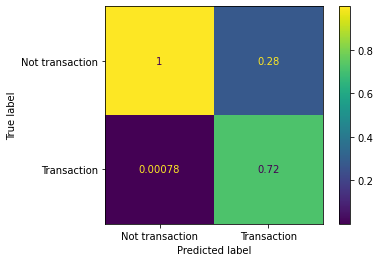

In [48]:
plot_confusion_matrix(clf_s_t,
                      X_test_s,
                      y_test_s,
                      display_labels=['Not transaction','Transaction'],
                      normalize='pred')

In [49]:
score_s_t = Model_Score(clf_s_t, y_test_s, X_test_s)

score_s_t

,Recall,Precision,F1_score
0,0.534483,0.72093,0.613861


## Direct DF - XGB - USTL - Without Zeros <a id='direct'>


In [50]:
X_train_2, y_train_2 = Without_Zeros(direct_df)

In [51]:
X_train_d, y_train_d = Ustl_Split(X_train_2, y_train_2)

In [52]:
 X_test_d, y_test_d = Raw_Data(direct_df)[1:4:2]

In [53]:
def gb_mse_cv( params, random_state=0, cv=4, X = X_train_d, y = y_train_d):

    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'learning_rate': int(params['learning_rate']),
             }

    model = xgb.XGBClassifier(random_state=0, **params)
    
    score = -cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    return score

In [54]:
#%time GB_hyperopt(gb_mse_cv, X_train_d, y_train_d, X_test_d, y_test_d.values.ravel())

In [55]:
clf_d_t = xgb.XGBClassifier(random_state = 0,
                           learning_rate = 0.2563253209599783,
                           max_depth = 6,
                           n_estimators = 1581,
                           )

clf_d_t.fit(X_train_d,y_train_d)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2563253209599783, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1581, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

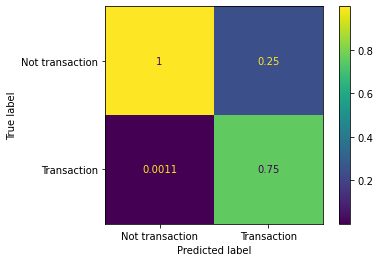

In [56]:
plot_confusion_matrix(clf_d_t,
                      X_test_d,
                      y_test_d,
                      display_labels=['Not transaction','Transaction'],
                      normalize='pred')

In [57]:
score_d_t = Model_Score(clf_d_t, y_test_d, X_test_d)

score_d_t

,Recall,Precision,F1_score
0,0.573333,0.754386,0.651515


## Paid Search DF - XGB - USTL - Without Zeros <a id='paidsearch'>

In [58]:
X_train_2, y_train_2 = Without_Zeros(paidsearch_df)

In [59]:
X_train_ps, y_train_ps = Ustl_Split(X_train_2, y_train_2)

In [60]:
X_test_ps, y_test_ps = Raw_Data(paidsearch_df)[1:4:2]

In [61]:
def gb_mse_cv( params, random_state=0, cv=4, X=X_train_ps, y=y_train_ps):
   

    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'learning_rate': int(params['learning_rate']),
             }

    model = xgb.XGBClassifier(random_state=0, **params)
    

    score = -cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()
    

    return score

In [62]:
#%time GB_hyperopt(gb_mse_cv, X_train_ps, y_train_ps, X_test_ps, y_test_ps.values.ravel())

In [63]:
clf_ps_t = xgb.XGBClassifier(random_state = 0,
                           learning_rate = 0.03823986877162998,
                           max_depth = 6,
                           n_estimators = 946)

clf_ps_t.fit(X_train_ps,y_train_ps)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03823986877162998, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=946, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

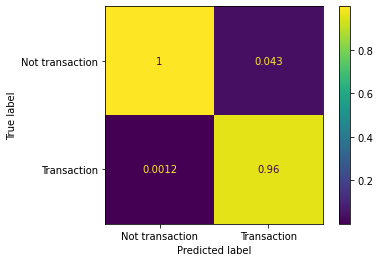

In [64]:
plot_confusion_matrix(clf_ps_t,
                      X_test_ps,
                      y_test_ps,
                      display_labels=['Not transaction','Transaction'],
                      normalize='pred')

In [65]:
score_ps_t = Model_Score(clf_ps_t, y_test_ps, X_test_ps)

score_ps_t

,Recall,Precision,F1_score
0,0.26506,0.956522,0.415094


## Organic - XGB - Unbalanced DF - Without Zeros <a id='organic'>

In [66]:
X_train_o, y_train_o = Without_Zeros(organic_df)

In [67]:
X_test_o, y_test_o = Raw_Data(organic_df)[1:4:2]

In [68]:
def gb_mse_cv( params,  cv=4, X = X_train_o, y = y_train_o):
   

    params = { "n_estimators" : int(params['n_estimators']),
                  "max_depth" : int(params['max_depth']),
                  "learning_rate": params['learning_rate'],
              }
              
    model = xgb.XGBClassifier(random_state=0,**params)
    
    score = -cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()
    
    return score

In [69]:
#%time GB_hyperopt(gb_mse_cv, X_train_o, y_train_o, X_test_o, y_test_o.values.ravel())

In [70]:
clf_o_t = xgb.XGBClassifier(random_state = 0,
                            max_depth= 9 ,
                            n_estimators = 1169 ,
                            learning_rate= 0.7445931836683217  ) 

clf_o_t.fit(X_train_o,y_train_o)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7445931836683217, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1169, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

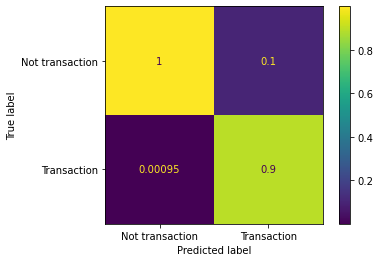

In [71]:
plot_confusion_matrix(clf_o_t,
                      X_test_o,
                      y_test_o,
                      display_labels=['Not transaction','Transaction'],
                      normalize='pred')

In [72]:
score_o_t = Model_Score(clf_o_t, y_test_o, X_test_o)

score_o_t

,Recall,Precision,F1_score
0,0.639456,0.895238,0.746032


## Full DF - XGB - USTL - Without Zeros <a id='fulldf'>


In [73]:
X_train_2, y_train_2= Without_Zeros(full_df)

In [74]:
X_train_f, y_train_f = Ustl_Split(X_train_2, y_train_2)

In [75]:
X_test_f, y_test_f = Raw_Data(full_df)[1:4:2]

In [76]:
def gb_mse_cv( params, random_state=0, cv=4, X = X_train_f, y = y_train_f):
   

    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'learning_rate': int(params['learning_rate'])
             }

    model = xgb.XGBClassifier(random_state=0, **params)
    

    score = -cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()
    

    return score

In [77]:
#%time GB_hyperopt(gb_mse_cv, X_train_f, y_train_f, X_test_f, y_test_f.values.ravel())

In [78]:
clf_f_t = xgb.XGBClassifier(random_state = 0,
                           learning_rate = 0.03053044253030009,
                           max_depth = 9,
                           n_estimators = 994)

clf_f_t.fit(X_train_f,y_train_f)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03053044253030009, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=994, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

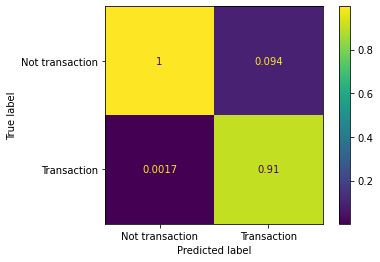

In [79]:
plot_confusion_matrix(clf_f_t,
                      X_test_f,
                      y_test_f,
                      display_labels=['Not transaction','Transaction'],
                      normalize='pred')

In [80]:
score_f_t = Model_Score(clf_f_t, y_test_f, X_test_f)

score_f_t

,Recall,Precision,F1_score
0,0.244898,0.90566,0.385542


## Tuning Results <a id='tr'>

Building 3 tables with the precision, recall and F1-score before and after tuning.

In [81]:
#F1_Score

f1={'Social DF - XGB - USTL - Without Zeros': [social_top5_methods['F1_Score'][0],
                                                                    score_s_t['F1_score'][0]
                                                                  ],
    'Direct DF - XGB - USTL - Without Zeros' : [direct_top5_methods['F1_Score'][0],
                                                                    score_d_t['F1_score'][0]
                                                                   ],
               
    'Paid Search DF - XGB - USTL - Without Zeros': [paidsearch_top5_methods['F1_Score'][0],
                                                                score_ps_t['F1_score'][0] 
                                                            ],
    'Organic DF - XGB - Unbalanced DF - Without Zeros': [organic_top5_methods['F1_Score'][0],
                                                        score_o_t['F1_score'][0]
                                                       ],
    
    'Full DF - XGB - USTL - Without Zeros':  [full_top5_methods['F1_Score'][0],
                                                   score_f_t['F1_score'][0]
                                                  ],
            }

f1_Score=pd.DataFrame.from_dict(f1, columns=['F1 Before Tunnig','F1-Score Tunned'],orient='index')
                          

#Precision

precision = {'Social DF - XGB - USTL - Without Zeros': [social_top5_methods['Precision'][0],
                                                                    score_s_t['Precision'][0]
                                                                  ],
           'Direct DF - XGB - USTL - Without Zeros' : [direct_top5_methods['Precision'][0],
                                                                    score_d_t['Precision'][0]
                                                                   ],
           'Paid Search DF - XGB - USTL - Without Zeros': [paidsearch_top5_methods['Precision'][0],
                                                                score_ps_t['Precision'][0] 
                                                            ],
           'Organic DF - XGB - Unbalanced DF - Without Zeros': [organic_top5_methods['Precision'][0],
                                                        score_o_t['Precision'][0]
                                                       ],
           'Full DF - XGB - USTL - Without Zeros':  [full_top5_methods['Precision'][0],
                                                   score_f_t['Precision'][0]
                                                  ],
           
             }

precision = pd.DataFrame.from_dict(precision, columns=['Precision Before Tunnig','Precision Tunned'],orient='index')

#Recall

recall = {'Social DF -  XGB - USTL - Without Zeros': [social_top5_methods['Recall'][0],
                                                                    score_s_t['Recall'][0]
                                                                  ],
          
        'Direct DF - XGB - XGB - USTL - Without Zeros' : [direct_top5_methods['Recall'][0],
                                                                    score_d_t['Recall'][0]
                                                                   ],
          
          'Paid Search DF - XGB - USTL - Without Zeros': [paidsearch_top5_methods['Recall'][0],
                                                                score_ps_t['Recall'][0] 
                                                            ],
          
          'Organic DF - XGB - Unbalanced DF - Without Zeros': [organic_top5_methods['Recall'][0],
                                                        score_o_t['Recall'][0]
                                                       ],
          
          'Full DF - XGB - USTL - Without Zeros':  [full_top5_methods['Recall'][0],
                                                   score_f_t['Recall'][0]
                                                  ],

             }

recall = pd.DataFrame.from_dict(recall, columns=['Recall Before Tunnig','Recall Tunned'],orient='index')
                          

## Precision

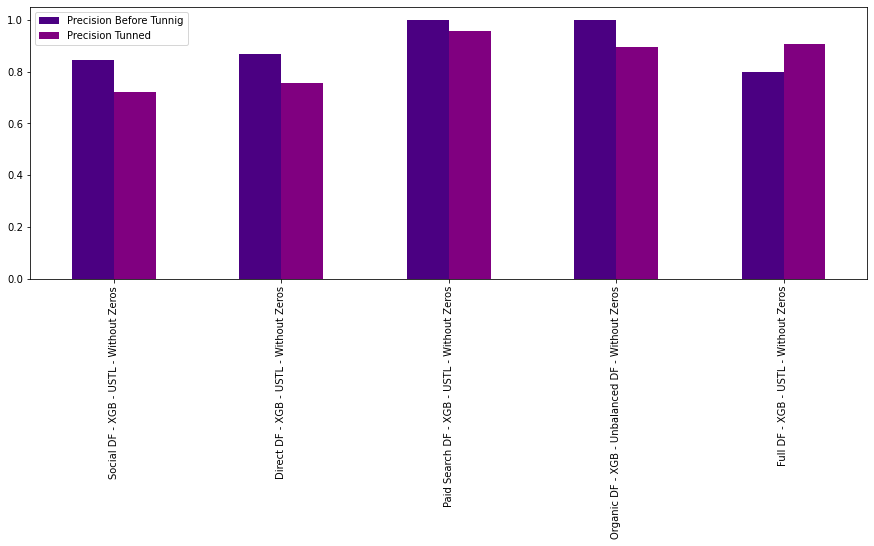

In [82]:
precision.plot.bar(figsize=(15,5),color=['#4B0082','purple'])

## Recall

In [83]:
precision.sort_values(by='Precision Tunned',ascending=False)

,Precision Before Tunnig,Precision Tunned
Paid Search DF - XGB - USTL - Without Zeros,1.000000,0.956522
Full DF - XGB - USTL - Without Zeros,0.800000,0.905660
Organic DF - XGB - Unbalanced DF - Without Zeros,1.000000,0.895238
Direct DF - XGB - USTL - Without Zeros,0.866667,0.754386
Social DF - XGB - USTL - Without Zeros,0.846154,0.720930


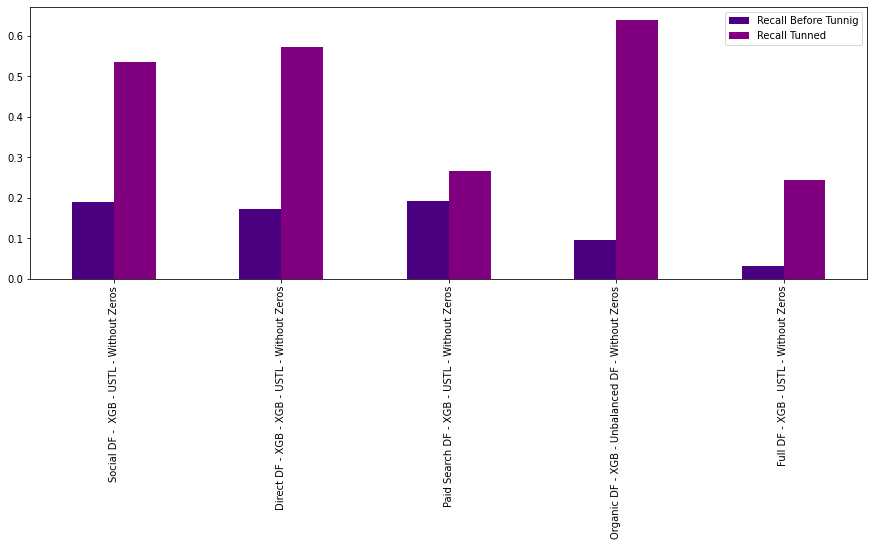

In [84]:
recall.plot.bar(figsize=(15,5),color=['#4B0082','purple'])

In [85]:
recall.sort_values(by='Recall Tunned',ascending=False)

,Recall Before Tunnig,Recall Tunned
Organic DF - XGB - Unbalanced DF - Without Zeros,0.095238,0.639456
Direct DF - XGB - XGB - USTL - Without Zeros,0.173333,0.573333
Social DF - XGB - USTL - Without Zeros,0.189655,0.534483
Paid Search DF - XGB - USTL - Without Zeros,0.192771,0.265060
Full DF - XGB - USTL - Without Zeros,0.030612,0.244898


## F1-Score

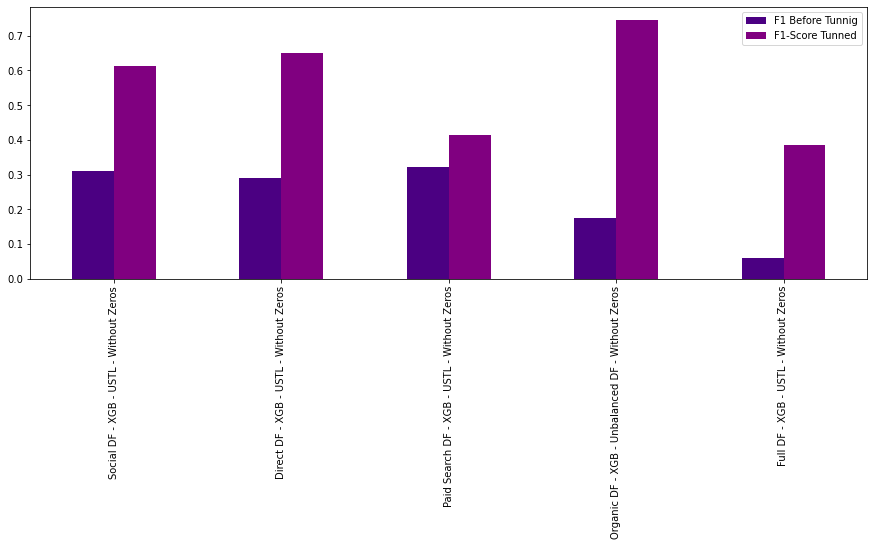

In [86]:
f1_Score.plot.bar(figsize=(15,5),color=['#4B0082','purple'])

In [87]:
f1_Score.sort_values(by='F1-Score Tunned',ascending=False)

,F1 Before Tunnig,F1-Score Tunned
Organic DF - XGB - Unbalanced DF - Without Zeros,0.173913,0.746032
Direct DF - XGB - USTL - Without Zeros,0.288889,0.651515
Social DF - XGB - USTL - Without Zeros,0.309859,0.613861
Paid Search DF - XGB - USTL - Without Zeros,0.323232,0.415094
Full DF - XGB - USTL - Without Zeros,0.058968,0.385542


# Feature Importance and Decision Tree Plot <a id='clfplot'>




To plot a XGBoost Classification model with the features names we the plot_tree function.


In [88]:
from xgboost import plot_tree

As the classifier winner in all data frames was the XGBoost, which works on the principle of ensemble. Our models are constituted by a lot of trees. To extract the decision rule we have to find the ordinal number of the best iteration booster to set as the "num_tree" parameter. 

To do that we will use two functions that set  it for us .get_booster and .best_iteration. 

Also, below we defined a function to plot the feature importances.

In [89]:
def Feat_Importances(clf,X_train):
    
    feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)[::-1]
    
    return feat_importances.nlargest(20).plot(kind='barh',color='#4B0082')

## Social - Decision Tree and Feature Importance  <a id='socialtree'>

In [90]:
clf_s_t.get_booster().best_iteration

665

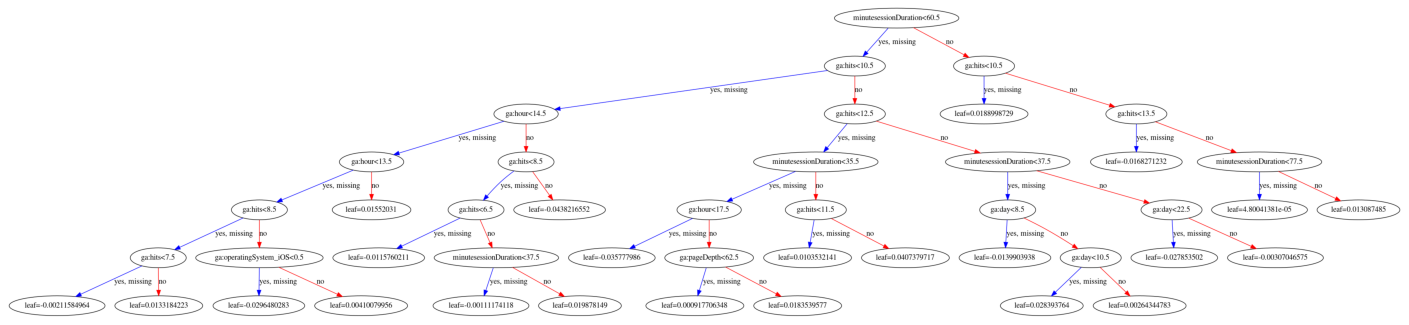

In [91]:
fig, ax = plt.subplots(figsize=(25, 25))  # whatever size you want
plot_tree(clf_s_t, ax=ax , num_trees=665)

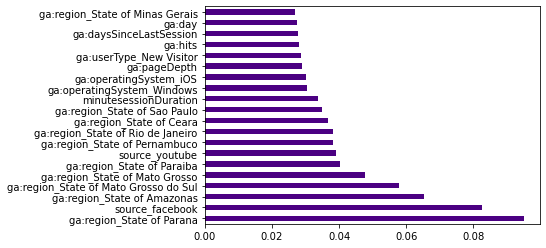

In [92]:
Feat_Importances(clf_s_t,X_train_s)

## Direct - Decision Tree and Feature Importance  <a id='directtree'>

In [93]:
clf_d_t.get_booster().best_iteration

1580

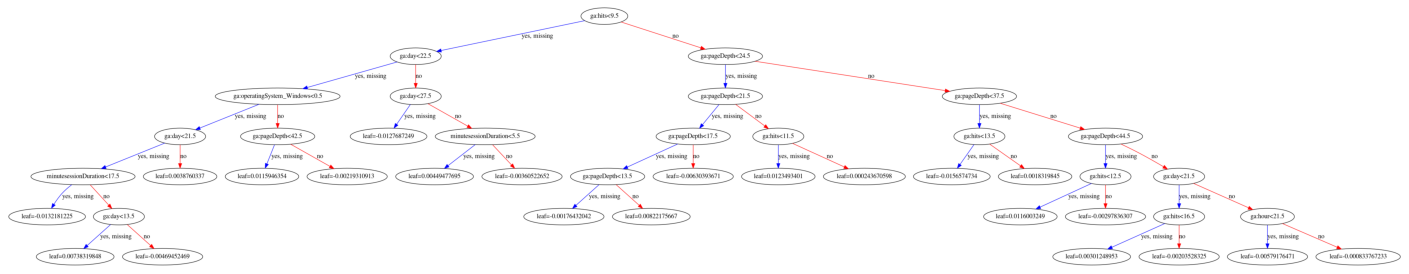

In [94]:
fig, ax = plt.subplots(figsize=(25, 25))  # whatever size you want
plot_tree(clf_d_t, ax=ax , num_trees=1580)

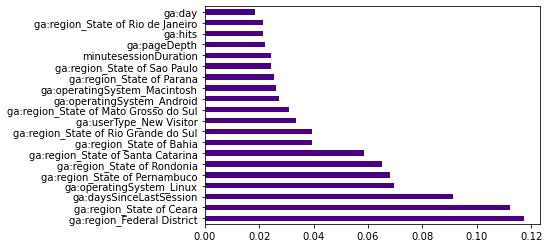

In [95]:
Feat_Importances(clf_d_t,X_train_d)

## PaidSearch - Decision Tree and Feature Importance <a id='paidsearchtree'>


In [96]:
clf_ps_t.get_booster().best_iteration

945

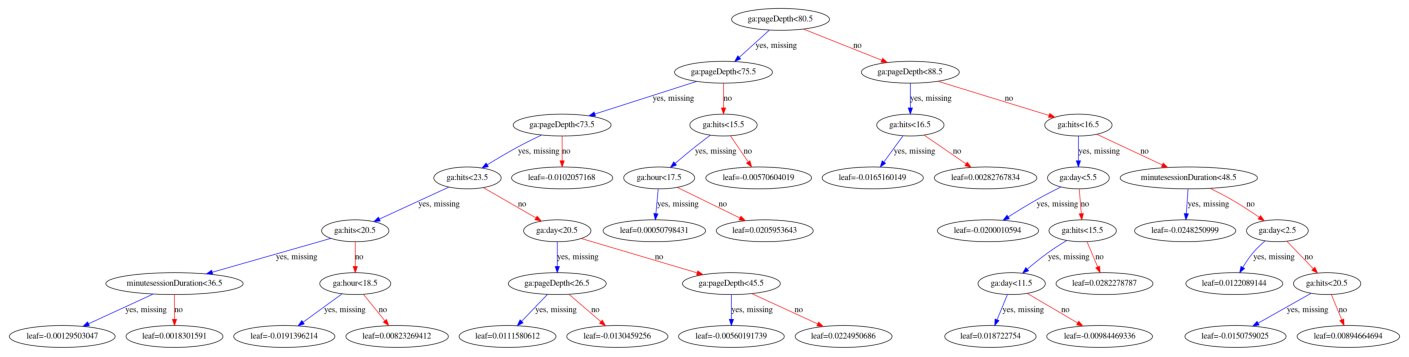

In [97]:
fig, ax = plt.subplots(figsize=(25, 25))  # whatever size you want
plot_tree(clf_ps_t, ax=ax , num_trees=945)

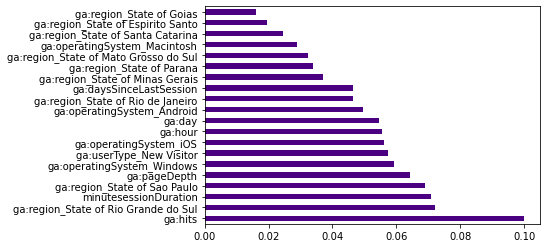

In [98]:
Feat_Importances(clf_ps_t,X_train_ps)

## Organic  - Decision Tree and Feature Importance <a id='organictree'>

In [99]:
clf_o_t.get_booster().best_iteration

1168

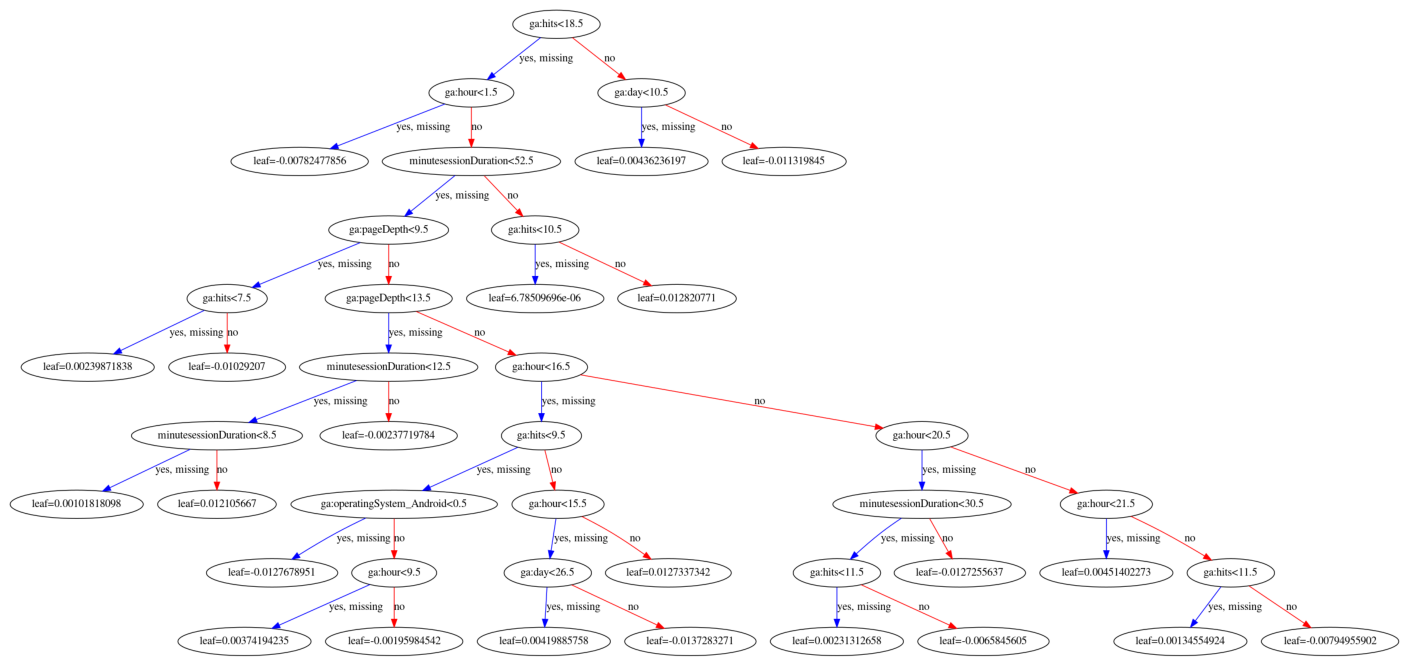

In [100]:
fig, ax = plt.subplots(figsize=(25, 25))  # whatever size you want
plot_tree(clf_o_t, ax=ax , num_trees=1168)


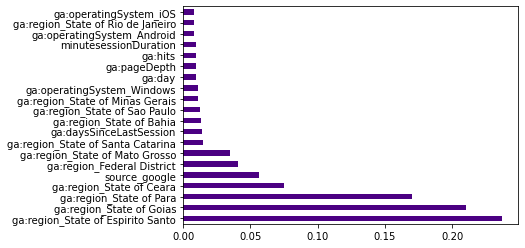

In [101]:

Feat_Importances(clf_o_t,X_train_o)

## Full DF - Decision Tree and Feature Importance <a name='fulldftree'>

In [102]:
clf_f_t.get_booster().best_iteration

993

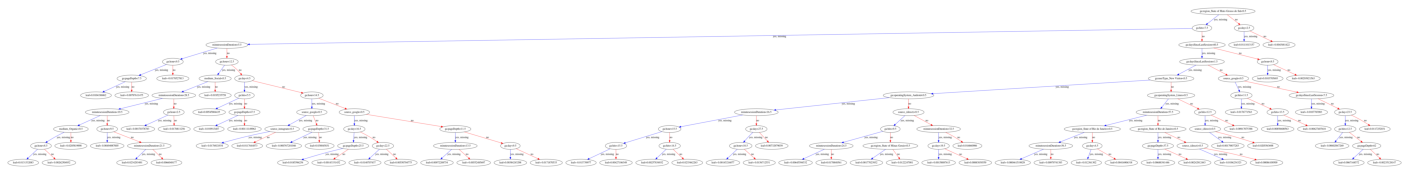

In [103]:
fig, ax = plt.subplots(figsize=(25, 50))  # whatever size you want
plot_tree(clf_f_t, ax=ax , num_trees=993)

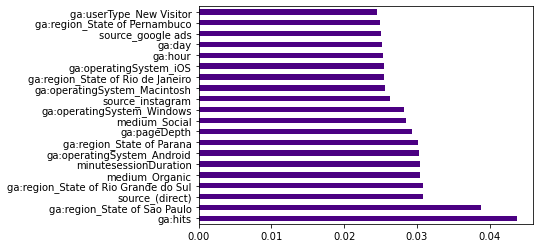

In [104]:
Feat_Importances(clf_f_t,X_train_f)

# Saving the Models <a id='saving'>

In [105]:
import joblib

In [106]:
joblib.dump(clf_s_t, 'social_model.sav')
joblib.dump(clf_d_t, 'direct_model.sav')
joblib.dump(clf_ps_t, 'paidsearch_model.sav')
joblib.dump(clf_o_t, 'organic.sav')
joblib.dump(clf_f_t,'full_df_model.sav')

['full_df_model.sav']

[Back to the top](#top)